In [23]:
import pandas as pd
import numpy as np

### Section 1: Importing Data

In [24]:
houses = pd.read_csv("housing.csv")

In [25]:
houses

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [26]:
features = ["longitude", "latitude", "housing_median_age", "total_bedrooms", "households", "median_income", "median_house_value",]

In [27]:
houses = houses.dropna(subset=features)

In [28]:
data = houses[features].copy()

In [29]:
data

,longitude,latitude,housing_median_age,total_bedrooms,households,median_income,median_house_value
0,-122.23,37.88,41.0,129.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,1106.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,190.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,235.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,280.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,374.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,150.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,485.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,409.0,349.0,1.8672,84700.0


### Section 2: Scaling Data and Helper Functions

#### Steps to make clustering:
1. Scale data (range from 1-10)
2. Initialize random centroids
3. Label each data point
4. Update centroids
5. Repeat steps 3-4 until centroids stop changing

##### Section 2.1: Scaling and Random Centroids

In [30]:
# 1. Make data.min() become zero
# 2. Divide by the range (max - min)
# 3. Multiply by nine and add 1 to make range from 1-10
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [31]:
data.describe()

,longitude,latitude,housing_median_age,total_bedrooms,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,5.284243,3.958448,5.876428,1.749819,1.737691,3.092478,4.560374
std,1.796036,2.043266,2.222083,0.588527,0.565810,1.178854,2.142096
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.285857,2.329437,4.000000,1.412011,1.412926,2.280962,2.939186
50%,6.252988,2.645058,5.941176,1.606145,1.603848,2.884760,4.056295
75%,6.683267,5.954304,7.352941,1.902235,1.892452,3.634233,5.633608
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [32]:
data

,longitude,latitude,housing_median_age,total_bedrooms,households,median_income,median_house_value
0,2.900398,6.107333,8.058824,1.178771,1.185002,5.857016,9.120397
1,2.909363,6.088204,4.529412,2.543296,2.682782,5.842244,7.374219
2,2.891434,6.078640,10.000000,1.263966,1.260483,5.194252,7.255457
3,2.882470,6.078640,10.000000,1.326816,1.322644,4.192287,7.055045
4,2.882470,6.078640,10.000000,1.389665,1.381845,3.076985,7.071746
...,...,...,...,...,...,...,...
20635,3.922311,7.637620,5.235294,1.520950,1.486926,1.658170,2.170942
20636,3.814741,7.647184,4.000000,1.208101,1.167242,2.276679,2.152385
20637,3.805777,7.589798,3.823529,1.675978,1.639369,1.744879,2.434446
20638,3.716135,7.589798,4.000000,1.569832,1.515047,1.848657,2.293415


In [33]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [34]:
centroids = random_centroids(data, 5)

<ipython-input-33-3d018814f2ee>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


In [35]:
centroids

,0,1,2,3,4
longitude,6.333665,6.432271,6.683267,7.660359,7.525896
latitude,2.176408,5.093518,6.040383,5.963868,5.896918
housing_median_age,8.411765,2.764706,5.941176,7.882353,8.058824
total_bedrooms,1.907821,5.688547,1.403631,1.325419,2.075419
households,1.541687,2.280217,2.410459,2.946226,3.442033
median_income,5.515083,2.939690,2.870050,3.824471,1.937042
median_house_value,2.221044,2.350941,5.538969,3.544132,3.217535


##### Section 2.2: Labeling Data Points

In [36]:
# Distance formula
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data-x) ** 2).sum(axis=1)))
    print(distances)
    return distances.idxmin(axis=1)

In [37]:
labels = get_labels(data, centroids)

              0          1         2         3         4
0      8.702918  10.835291  6.488444  7.813983  8.806114
1      8.394572   7.760623  5.460109  7.356850  8.193272
2      7.452565  10.752282  6.367394  6.762838  7.590209
3      7.427217  10.467105  6.013120  6.513343  7.087131
4      7.708976  10.368864  5.862767  6.540645  6.799385
...         ...        ...       ...       ...       ...
20635  7.794894   6.208787  4.934699  5.703303  5.412134
20636  8.176786   6.057289  5.289922  6.340833  6.362937
20637  8.430313   5.674235  5.170870  6.431358  6.221106
20638  8.317619   5.820457  5.232492  6.391350  6.219716
20639  8.314491   5.405805  5.189957  6.412156  6.298154

[20433 rows x 5 columns]


In [38]:
labels.value_counts()

2    11637
0     4620
1     2255
4     1716
3      205
Name: count, dtype: int64

##### Section 2.3: Update Centroids 

In [39]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [46]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2) 
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

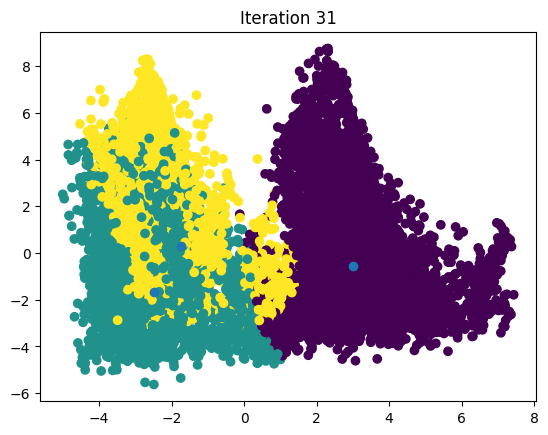

In [47]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1
    

In [52]:
centroids

,0,1,2
longitude,3.243284,6.741311,6.530338
latitude,6.147073,2.198698,2.341550
housing_median_age,5.435324,3.535092,7.279385
total_bedrooms,1.645712,1.912511,1.570254
households,1.636406,1.884880,1.574554
median_income,2.869342,3.149717,2.774264
median_house_value,3.910219,4.309050,4.215385


from sklearn.cluster import KMeans

In [53]:
kmeans = KMeans(4)
kmeans.fit(data)

<class 'NameError'>: name 'KMeans' is not defined

In [54]:
centroids = kmeans.cluster_centers_

<class 'NameError'>: name 'kmeans' is not defined

In [51]:
pd.DataFrame(centroids, columns=features).T

,longitude,latitude,housing_median_age,total_bedrooms,households,median_income,median_house_value
longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_median_age,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bedrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN
households,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_house_value,NaN,NaN,NaN,NaN,NaN,NaN,NaN
